# 03.1 Aprendizaje no supervisado. Clustering 

In [21]:
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np
from skimage import io
from IPython import display

## Aprendizaje no supervisado

- Aquí partimos de un conjunto de __validación__ que no ha sido clasificado previamente.
- Este conjunto de __validación__ está formado por $N$ registros $\{ x^1, ..., x^i, ..., x^N \}$, cada una de las cuales está descrito por un vector de $n$ atributos, por tanto $x^i \in R^n$.
- Al no existir la matriz $y$ con la variable objetivo, no existe un conjunto de entrenamiento.
- Los métodos no supervisados pretenden "aprender" relaciones entre los datos y clasificarlos "sin usar conocimiento previo".
- Estos métodos se basan en buscar __estructuras__, __patrones__ o __características__ que sirvan para aprender posibles relaciones en los datos.

## Clustering

__Clustering__ se refiere a las técnicas para encontrar __subgrupos o clusters__ en conjunto de datos. Cuando se hace un cluster se buscan particiones en las que las observaciones sean similares entre sí. 

El clustering busca encontrar subgrupos homogéneos en las observaciones. 

Para realizar las agrupaciones utilizamos las __distancias__ o __similitudes__ entre los vectores de atributos $x$ asociados a distintos registros.

Un ejemplo de clustering para el grupo Iris:

<img src="images/Clustering_Iris.png" width="500px">

O un ejemplo de agrupación de semillas:

<img src="./images/Clustering_Semillas.png" width="500px">

O finalmente un ejemplo de cultivos celulares:

<img src="./images/Clustering_CultCell.png" width="500px">


Las __redes de coexpresión génica (GCN)__ son una herramienta fundamental para caracterizar genes mediante el estudio de sus patrones de correlación. Los genes __se agrupan en función de su similitud__ formando módulos (grupos). Se asume que los genes que se encuentran en el mismo módulo están __relacionados con un fenotipo determinado__, una enfermedad o tienen una función similar. Los métodos habituales para generar GCN usan algoritmos de __clustering__.

### Objetivo

Dadas N observaciones (registros) de n atributos, queremos asignarlas a K __grupos__ de forma que:

- __Cada__ elemento esté asignado a un __único__ grupo.
- __Todo__ elemento esté asignado a __algún__ grupo.
- Cada grupo sea internamente __homogéneo__.
- Los grupos sean distintos (__separados__) entre sí.

A veces la primera de las condiciones se relaja ("análisis de grupos difusos" o "_fuzzy cluster analysis_").


### Métodos de agrupamiento

- __Métodos de partición__. Tenemos datos heterogéneos y queremos __dividirlos__ en un número de grupos conocido de antemano (__K-means__).
- __Métodos jerárquicos__. Se descomponen __jerárquicamente__ los datos de acuerdo con su proximidad o similitud. Inspirados en el paradigma Darwiniano (__hipótesis similaridad - proximidad evolutiva en filogenias__)
- __Métodos basados en densidades__. Utilizan el grado de aglomeración de los datos para estimar los grupos (__DBSCAN__).
- __Métodos basados en distribuciones__. Proponen un modelo como hipótesis y se busca el mejor ajuste de los datos ("__Gaussian mixture models__", ajustados mediante el algoritmo de "expectation-maximization").

### Similitud y distancia

__¿Cómo asignamos una observación a un grupo?__

- En función de la __distancia__ de esa observación a los elementos del grupo.
- En función de la __similitud__ de esa observación a los elementos del grupo.

En un espacio vectorial se define una __distancia__ $d_{ij}$ entre dos vectores $x^{(i)}$ y $x^{(j)}$ si cumple:
- $d_{ij} \ge 0$. Además si $d(u, v) = 0 \rightarrow u=v$ (__definida positiva__).
- $d_{ij} = d_{ji}$ o __propiedad simétrica__.
- $d_{ij} + d_{jk} \ge d_{ik}$ o __propiedad triangular__.

Las medidas de distancia son útiles cuando los atributos son __cuantitativos__ exclusivamente.

__Ejemplos de distancia__:

- Distancia __euclídea__:

$$d_{ij} = \sqrt{ \sum_{p=1}^n (x_p^{(i)}-x_p^{(j)})^2}$$

- Distancia rectangular __(Manhattan)__:

$$d_{ij} = \sum_{p=1}^n \begin{vmatrix}x_p^{(i)}-x_p^{(j)}\end{vmatrix}$$

- Distancia __Mahalanobis__:

$$d_{ij} = (x^{(i)}-x^{(j)})^T \Gamma ^{-1} (x^{(i)}-x^{(j)})$$

Siendo $\Gamma$ la matriz de varianzas y covarianzas.

### Similitud

En el espacio vectorial $\mathcal{R}^n$ se define la __similitud__ entre dos vectores $u$ y $v$ como

- $0 \le s_{ij} \le 1$
- $s_{ij} = s_{ji}$
- $s_{ii}=1$

Por ejemplo el __coeficiente de Gower__ se puede emplear para calcular la similitud tanto para propiedades continuas como discretas:

$$s_{ij}=\frac{\sum_{k=1}^n w_k^{ij}s_k^{ij}}{\sum_{k=1}^n w_k^{ij}} \qquad  s_p^{ij} = 1 - \frac{|x_p^i - x_p^j|}{rango(p)} $$

Siendo $s_p^{ij}$ la similitud entre los registros i y j para el atributo p, $w_k^{ij} \in \{0,1\}$ (según esté el atributo incluido o no), y el rango del atributo

$$rango(p)=\displaystyle\max_{i \in \{1,...,N\}}x_p^i - \min_{i \in \{1,...,N\}} x_p^i $$

Las medidas de similitud son útiles cuando los atributos son __categóricos__ (o de ambos tipos).

En el caso de usar una similitud los algoritmos de clustering seran igual pero sustituyendo la matriz de distancia por una de similitud. La diagonal principal serían _unos_ y el cálculo de las similitudes entre dos elementos sería como se indica en el ejemplo que aparece a continuación.

Se calcula la similitud entre las variedades __Canilla/Trad__ y __Criollo__. Se consideran todas los atributos incluidos entre las dos variedades consideradas.

<img src="images/Calculo_Similitud.png" width="700px">

## Clustering K-Medias

El __algoritmo K-Means o K-Medias__ propuesto por __Lloyd__ pretende partir un conjunto de <b>$N$</b> registros u observaciones en <b>$K$</b> grupos, de forma que su distancia al centroide de cada grupo sea mínima (o la similitud con respecto al centroide sea máxima). Los pasos del algoritmo son: 

1. Se seleccionan aleatoriamente <b>$K$</b> centroides.
2. Se asigna cada uno de los restantes <b>$N$</b> puntos al centroide <b>$C_i$</b> más cercano, $j=(1,...,K)$
3. Recalcular los centroides según se cambios puntos en cada grupo
4. Repetir los puntos 2 y 3 hasta que los grupos no cambien o se supere una tolerancia de usuario o un número máximo de iteraciones.

__El algoritmo mínimiza la Suma de las distancias al cuadrado entre cada punto y su centroide__


__Resumiendo gráficamente los pasos del algoritmo__

<img src="images/Kmedias-esquema.png" width="900px">

__Observaciones sobre el algoritmo K-Medias:__

- Algoritmo abordable con una __programación estándar__ aunque conviene estructurar las n observaciones en un __árbol kd__ donde los puntos d-dimensionales se dividen en k medianas sucesivas, lo que facilita las búsquedas.

- El algoritmo es __muy dependiente de la elección random de los primeros K puntos como centroides iniciales__.

- Matemáticamente equivale a dividir el espacio de atributos en __polígonos o celdas de Voronoi__.

### Estandarización de atributos

__La suma de cuadrados NO es invariante bajo cambios de escala:__

- Si las unidades de medida de los atributos son __distintas__, el resultado de K-means puede depender de cambios irrelevantes en la escala de medida.
- Entonces conviene estandarizar cada atributo de forma __univariante__: restamos la media y dividimos entre la desviación típica. Así las medidas de distancia __tienen sentido__.

__Cuando tenemos las mismas unidades suele ser mejor no estandarizar:__

<img src="images/Kmedias-standarizado.png" width="700px">

### Pros y contras de K-Medias

__Ventajas__:

- Es __eficiente__ (converge rápidamente).
- La busqueda __heurística__ termina en un óptimo local.

__Desventajas__:

- No __robusto__ frente a observaciones __atípicas__.
- No aplicable si las variables son __categóricas__ (necesitamos que la media esté definida).
- No funciona si se buscan grupos __no convexos__.
- El número de grupos K __no es un resultado del método__ (debe especificarse al inicio).


## Segmentación de los datos Iris con K-means

__Se utilizan los 4 atributos del sépalo y pétalo (alto y largo) para segmentar en 3 grupos__

In [22]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
X = df.values[:,0:4]
y = df.values[:,4]

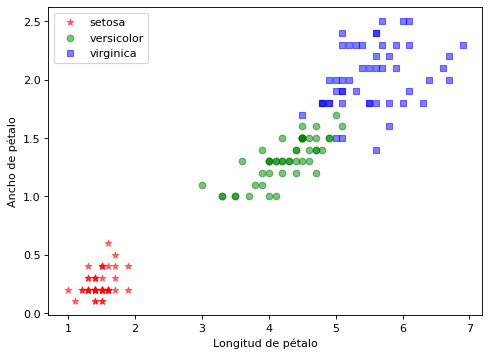

In [24]:
import matplotlib.pyplot as plt
clases = iris['target_names']
marcas = ['*', 'o', 's']
color = ['red', 'green', 'blue']
plt.figure(figsize=(7, 5), dpi=80)
for i in range(len(clases)):
    plt.scatter(X[y==i,2], X[y==i,3], c=color[i], alpha=0.5, marker=marcas[i], label=clases[i])
plt.xlabel("Longitud de pétalo")
plt.ylabel("Ancho de pétalo")
plt.legend(loc='upper left')
plt.show()

Se llevará a cabo una agrupación de 3 grupos (__n_cluster__), se ejecuta el algoritmo 10 veces (__n_init__) independientemente con diferentes centroides aleatorios para elegir el modelo final que tiene el SSE más bajo. Se elege una tolerancia (__tol__) de 0.0001 ($10^{-4}$) para controlar la convergencia de los mínimos cuadrados.

Un problema con k-means es que uno o más grupos pueden estar vacíos. Sin embargo, en la implementación actual de kmeans en scikit-learn, si un grupo está vacío, el algoritmo tomará la muestra más cercana al centroide del grupo vacío. Luego reasignará el centroide para que sea el punto más alejado.

La variable __init__ permite indica el tipo de 
- '__k-means++__': selecciona los centros de clúster iniciales para el agrupamiento de k-means de una manera inteligente para acelerar la convergencia. 
- '__random__': elija n_clusters observaciones (filas) al azar de los datos para los centroides iniciales.
- '__ndarray__': debe tener forma (n_clusters, n_features) y en el se proporcionan los centros iniciales.
- '__callable__': se le pasa el nombre de una rutina externa que realiza la inicialización.

In [25]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=1)
y_km = km.fit_predict(X)
y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

__La inercia es la suma de la distancia al cuadrado entre cada punto y su centroide__

In [26]:
print(km.inertia_)
# print(km.cluster_centers_)
iner = 0
for et in np.unique(y_km):
    centr = km.cluster_centers_[et]
    d_centr = 0
    for x in X[y_km==et]:
        d_centr += ((centr[0]-x[0])**2 + (centr[1]-x[1])**2 + (centr[2]-x[2])**2 + (centr[3]-x[3])**2)
        iner += d_centr
    print(et,d_centr)
# print(iner)

78.85144142614601
0 23.879473684210524
1 15.151000000000002
2 39.820967741935476


__Podemos mostrar las coordenadas de los centroides__

Directamente mostrando la variable <b>cluster_centers_</b> que aparece en el objeto que hemos creado con KMeans o algo más vistoso con un DataFrame:

In [27]:
pd.DataFrame(columns=df.columns[0:4],index = np.arange(3),data = km.cluster_centers_)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.850000,3.073684,5.742105,2.071053
1,5.006000,3.428000,1.462000,0.246000
2,5.901613,2.748387,4.393548,1.433871


La visualización del ajuste realizado es el siguiente:

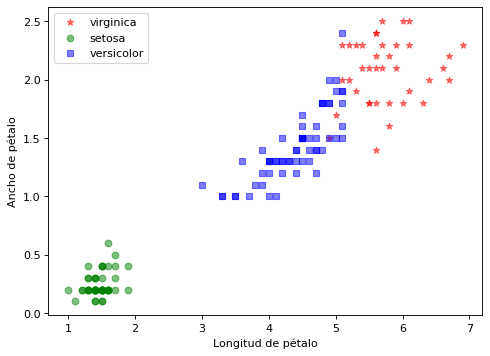

In [28]:
import matplotlib.pyplot as plt
clases = iris['target_names']
clases = ['virginica','setosa','versicolor']
marcas = ['*', 'o', 's']
color = ['red', 'green', 'blue']
plt.figure(figsize=(7, 5), dpi=80)
for i in range(len(clases)):
    plt.scatter(X[y_km==i,2], X[y_km==i,3], c=color[i], alpha=0.5, marker=marcas[i], label=clases[i])
plt.xlabel("Longitud de pétalo")
plt.ylabel("Ancho de pétalo")
plt.legend(loc='upper left')
plt.show()

## Medidas de validación interna

__Objetivos__:

- Queremos grupos __homogéneos__.
- Tienen que estar __bien separados__ entre sí.

__En K-means__:

- Buscamos el menor cociente entre la variabilidad __intra__-grupo y la variabilidad __total__ (grupos homogéneos).
- Buscamos el mayor cociente posible entre la variabilidad __entre__ grupos y la variabilidad __total__ (grupos separados).


### Método del codo

Para cuantificar la calidad de la agrupación, necesitamos utilizar métricas intrínsecas, como el SSE (suma de la distancia al cuadrado de cada uno de las observaciones a su centroide) dentro del cluster. El SSE midel la distorsión, y permite comparar el rendimiento de diferentes agrupaciones de k-medias. No es necesirio calcular de forma explícita el SSE dentro del clúster cuando usamos scikit-learn, ya que es accesible a través del atributo __inertia___ después de ajustar un modelo KMeans.

Se puede graficar el nº de Clusters contra el SSE interno, lo que nos permite obtener el nº de cluster optimo. Se denomina __método del codo__ por la forma que adopta el gráfico, ya que en el cambio brusco de la pendiente se situa el óptimo (en nuestro ejemplo se ve que está entre 2 y 3): 

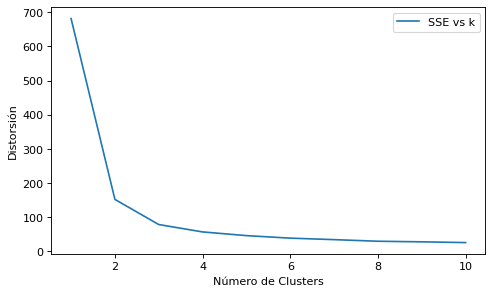

In [29]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, tol=1e-04, random_state=1)
    km.fit(X)
    distortions.append(km.inertia_)
plt.figure(figsize=(7, 4), dpi=80)
plt.plot(range(1,11), distortions, label="SSE vs k")
plt.xlabel("Número de Clusters")
plt.ylabel("Distorsión")
plt.legend(loc='upper right')
plt.show()

Se puede calcular el __SSE relativo__ dividiendo por el SSE total, calculándolo para K = 1 

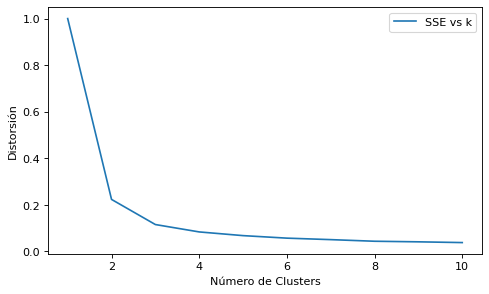

In [30]:
km = KMeans(n_clusters=1, init='k-means++', max_iter=300, tol=1e-04, random_state=1)
km.fit(X)
SSE_total = km.inertia_
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, tol=1e-04, random_state=1)
    km.fit(X)
    distortions.append(km.inertia_/SSE_total)

plt.figure(figsize=(7, 4), dpi=80)
plt.plot(range(1,11), distortions, label="SSE vs k")
plt.xlabel("Número de Clusters")
plt.ylabel("Distorsión")
plt.legend(loc='upper right')
plt.show()

### Criterio de la silueta

El __coeficiente de silueta__ se calcula utilizando la __distancia media dentro del grupo (a)__ y la __distancia media del grupo más cercano (b)__ para cada muestra $x_i$ del conjunto $X$. 

Para cada $x_i$ se calcula $a_i$ como la distancia media al resto de puntos de su grupo. Y se calcula $b_i$ como la distancia media al siguiente grupo más cercano. Siendo el valor de la silueta en $x_i$, si el grupo al que pertenece tiene más de 1 punto:

$$s_i = \frac{b_i-a_i}{max\{a_i,b_i\}}$$

En el caso que $x_i$ sea un punto aislado, $s_i=0$

Si $a_i=b_i$ se cumple que $s_i=0$ y en general se cumple $-1 \le s_i \le 1$.

Si $a_i << b_i$ el valor de $s_i$ se acerca a 1. Como $a_i$ mide la disimilitud de la muestra $i$ con respecto a su grupo y $b_i$ mide la disimilitud en el grupo vecino, cuando $s_i$ se acerca a 1 indica que $i$ está bien emparejado. 

Si $a_i >> b_i$ lleva a que $s_i$ esté cerca de -1, lo que indican muestras mal emparejadas.

El __coeficiente de silueta__ para una agrupación en $k$ grupos es el __promedio__ de todos los valores $s_i$

__El mejor valor es 1 y el peor valor es -1__. Los valores cercanos a 0 indican clústeres superpuestos. Los valores negativos generalmente indican que una muestra se ha asignado al conglomerado equivocado, ya que un conglomerado diferente es más similar.

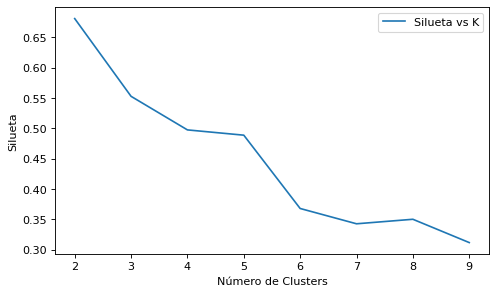

In [31]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
siluetas = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, tol=1e-04, random_state=1)
    km.fit(X)
    silueta = metrics.silhouette_score(X,km.labels_,metric="euclidean")
    siluetas.append(silueta)

plt.figure(figsize=(7, 4), dpi=80)
plt.plot(range(2,10), siluetas, label="Silueta vs K")
plt.xlabel("Número de Clusters")
plt.ylabel("Silueta")
plt.legend(loc='upper right')
plt.show()

__Para obtener el código de silueta__ $s_i$ de todos los registros de __X__ es necesario usar la librería:

sklearn.metrics.silhouette_samples

Se pueden mostrar la lista de $s_i$ en un gráfico para varios valores de k:

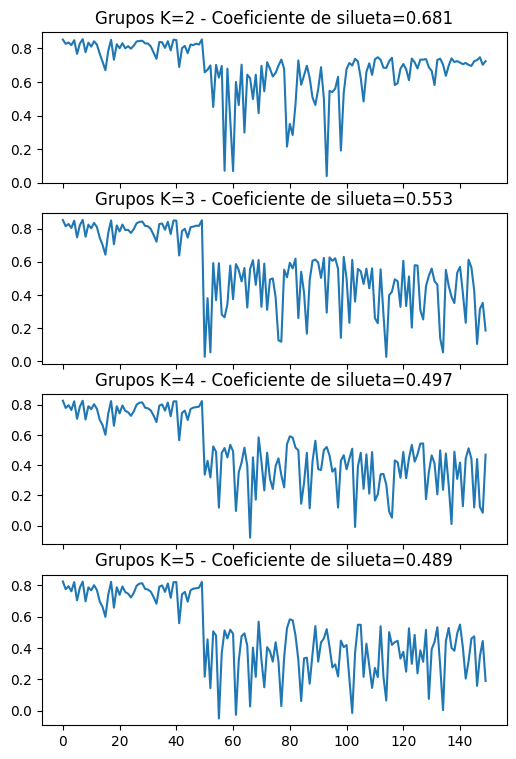

In [32]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
siluetas = []
fig, axs = plt.subplots(4, sharex=True, figsize=(6,9))
for i in range(2, 6):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, tol=1e-04, random_state=1)
    km.fit(X)
    siluetas = metrics.silhouette_samples(X,km.labels_,metric="euclidean")
    silueta = metrics.silhouette_score(X,km.labels_,metric="euclidean")
    axs[i-2].plot(siluetas)
    axs[i-2].set_title("Grupos K={:} - Coeficiente de silueta={:.3}".format(i, silueta))


__El criterio de la silueta__ nos da el mejor número de grupos en __2__.

## Resolución del algoritmo K-Means con un desarrollo propio


<span style='color:Red'> <font size="3"> <b>Información Complementaria:</b> Código con un desarrollo básico del algoritmo K-Means </font> </span>

In [33]:
from random import randint
import numpy as np
class KMedias:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-04, random_state=0):
        self.n_clusters=n_clusters
        self.max_iter=max_iter
        self.tol=tol
        self.random_state=random_state
    
    def clusterCercano(self, x):
        i_min=-1
        dis_min=-1
        for k in (range(self.n_clusters)):
            dist = np.linalg.norm(x-self.centroids[k]) ## Se calcula la distancia euclidea entre punto y centroide
            #print(k, self.centroids[k], x, x-self.centroids[k], dist)
            if (dis_min>dist or i_min==-1):
                i_min=k
                dis_min=dist
        #print("clusterCercano", x, i_min)
        return i_min
    
    def regeneraCentroide(self, ik):
        tot = 0
        for i in range(len(self.y)):
            if self.y[i]==ik:
                self.centroids[ik] = (self.X[i] + tot*self.centroids[ik])/(tot+1)
                tot+=1
        #print("regeneraCentroide", ik, self.centroids[ik], tot)
            
    
    def fit(self, X):
        N = len(X)
        d = len(X[0])
        self.X = X
        #print("Dimensiones", N, d)
        self.centroids = [[0 for i in range(d)] for j in range(self.n_clusters)]
        self.y = [-1 for i in range(N)]   ## Todos los puntos con -1 : desasignados
        for i in range(self.n_clusters):   ## Se toma los n_clusters vértices iniciales aleatorios
            ix = randint(int(i*N/self.n_clusters),int((i+1)*N/self.n_clusters))
            self.y[ix]=int(i)
            self.centroids[i]=X[ix]
            #print("Centroid Inicial", i, ix, self.centroids[i])
        ## Todos los centroides no asignados se insertan en uno de los cluster
        for i in range(N):
            if self.y[i]==-1:
                k = self.clusterCercano(X[i])
                self.y[i]=int(k)
                self.regeneraCentroide(k)
        ## Se itera para balancear los puntos entre los clusters
        it=0
        cambios=True
        while it <= self.max_iter and cambios==True:
            print("Iteracion...", it)
            cambios = False
            for i in range(N):
                if self.clusterCercano(X[i]) != self.y[i]:
                    w_y = self.y[i]
                    self.y[i]=self.clusterCercano(X[i])
                    self.regeneraCentroide(w_y)
                    self.regeneraCentroide(self.y[i])
                    cambios=True
            it+=1

        return np.asarray(self.y)


In [34]:
kmed = KMedias(n_clusters=3, max_iter=20, tol=1e-04, random_state=0)
y_kmed = kmed.fit(X)

Iteracion... 0
Iteracion... 1
Iteracion... 2
Iteracion... 3
Iteracion... 4
Iteracion... 5


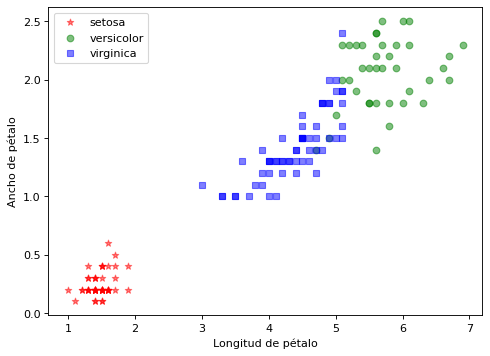

In [35]:
import matplotlib.pyplot as plt
clases = iris['target_names']
clases = ['setosa','versicolor','virginica']
marcas = ['*', 'o', 's']
color = ['red', 'green', 'blue']
plt.figure(figsize=(7, 5), dpi=80)
for i in range(len(clases)):
    plt.scatter(X[y_kmed==i,2], X[y_kmed==i,3], c=color[i], alpha=0.5, marker=marcas[i], label=clases[i])
plt.xlabel("Longitud de pétalo")
plt.ylabel("Ancho de pétalo")
plt.legend(loc='upper left')
plt.show()

## Modelos de Agrupación Probabilísticos (distribución gaussiana)

Los métodos de agrupación basado en __similitudes o distancias__ son métodos heurísticos de fácil implementación, pero adolecen de falta de base estadística sobre la que aplicar inferencia sobre una población a partir de una muestra. Los métodos de __agrupación probabilísticos__ suplen esta carencia asumiendo que existe una probabilidad de distribución subyacente. Se dice aquí que el clustering es _difuso_ o _borroso_ ("__fuzzy__"), pues cada observación tiene una probabilidad de pertenecer a un grupo.

Los __modelos de mezcla__ finitos se utilizan para clasificar variables en grupos proporcionando una representación natural de la heterogeneidad de los datos con un número finito de "variables latentes" (no se observadas) y que se deducen, mediante un modelo matemático, de otras variables observadas.

El algoritmo de __Expectación-Maximización__ consta de los siguientes pasos:

- __Inicialización__ : Se actualizan los parámetros con unos valores iniciales. Por ejemplo se generan K grupos con K-Means.
- __Itera hasta convergencia__ : Si no hay convergencia se detiene la iteración o hasta superar un valor de pasos.
    * __Paso E - Expectación__ : Se actualizan las variables del modelo estadístico con los datos observados,
    * __Paso M _ Maximización__ : Se actualizan los parámetros a partir de los datos completos generados en la expectativa.

Un modelo gaussiano univariante tiene una función de densidad que depende de dos variables $\mu$ y $\sigma$. Si fuera $n$-variante, tendremos un vector de medias $n$-dimensional ($\mu$) y una matriz $n \times n$ de covarianzas ($\Sigma$) respectivamente.

Para $K$ mezclas gaussianas en el paso inicial $m=0$ se adoptan valores de las probabilidades de pertenencia (pesos) a una mezcla $w_j^{(0)}$, medias $\mu_j^{(0)}$ y covarianzas $\Sigma_j^{(0)}$, siendo $j=1, ...,K$. Lo que permite hacer un cálculo de la __log-verosimilitud__ (siendo $\phi$ la función de distribución gaussiana):

$$\mathcal{L}^{(0)}=\frac{1}{N} \sum^N_{i=1} log (\sum^K_{j=1} w_j^{(0)} \phi(x_i|\mu_j^{(0)}, \Sigma_j^{(0)}))$$

En el __paso E__ (de expectación), se calcula la probabilidad $\gamma_{ij}$ de que el i-ésimo elemento pertenezca a la mezcla j-esima:

$$\gamma_{ij}^{(m)} = \frac{w_j^{(m)} \phi(x_i|\mu_j^{(m)}, \Sigma_j^{(m)})}{\sum_{k=1}^K w_k^{(m)} \phi(x_i|\mu_k^{(m)}, \Sigma_k^{(m)})} $$

Y la suma de las probabilidades de los $N$ elementos en cada uno de los $K$ grupos:

$$n_j^{(m)} = \sum_{i=1}^N \gamma_{ij}^{(m)}, j=1, ...K$$

En el __paso M__ (de maximización) se re-estiman los parámetros para una nueva etapa del algoritmo. En el caso de las mezclas gaussianas, los nuevos valores resultan (para $j=1, ...K$):

$$ w_j^{(m+1)}=\frac{n_j^{(m)}}{N} $$

$$ \mu_j^{(m+1)} = \frac{1}{n_j^{(m)}} \sum_{i=1}^N \gamma_{ij}^{(m)} x_i$$

$$ \Sigma_j^{(m+1)} = \frac{1}{n_j^{(m)}} \sum_{i=1}^N \gamma_{ij}^{(m)} (x_i - \mu_j^{(m+1)})(x_i - \mu_j^{(m+1)})^T$$

Se calcula la __nueva función de log-verosimilitud__:

$$\mathcal{L}^{(m+1)}=\frac{1}{N} \sum^N_{i=1} log (\sum^K_{j=1} w_j^{(m+1)} \phi(x_i|\mu_j^{(m+1)}, \Sigma_j^{(m+1)}))$$

Se controla la __convergencia__ volviendo al paso E en función de un umbral $\delta$ siempre que se cumpla:

$$|\mathcal{L}^{(m+1)}-\mathcal{L}^{(m)}|>\delta$$

En caso de que la diferencia entre las dos log-verosimilitudes hubiera quedado por debajo del umbral, el algoritmo terminaría.

### Implementación en sk-learn

El algoritmo __Gaussian mixture models (GMM)__, que se encuentra implementado en la librería __sklearn.cluster.GaussianMixture()__, teniendo el constructor los siguientes parámetros básicos:

- __n_components__: Número de distribuciones normales (o Clusters).
- __n_iter__: número máximo de ejecuciones de los pasos de esperanza y maximización a realizar en el caso de que no converjan las medias de las distribuciones normales
- __init_params__: El método utilizado para inicializar los pesos, las medias y las precisiones. Puede ser 'kmeans' o 'random'

In [36]:
from sklearn.mixture import GaussianMixture
num_clusters = 3
gmm = GaussianMixture(n_components=num_clusters, init_params='kmeans')
gmm.fit(X)

GaussianMixture(n_components=3)

__Se tiene los valores medios de cada cluster__

In [37]:
gmm.means_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.91697517, 2.77803998, 4.20523542, 1.29841561],
       [6.54632887, 2.94943079, 5.4834877 , 1.98716063]])

__La matrices de covarianzas de cada grupo__

Por ejemplo, la matriz del primer grupo:

In [38]:
gmm.covariances_[0]

array([[0.121765, 0.097232, 0.016028, 0.010124],
       [0.097232, 0.140817, 0.011464, 0.009112],
       [0.016028, 0.011464, 0.029557, 0.005948],
       [0.010124, 0.009112, 0.005948, 0.010885]])

__La probabilidad de pertenencia a cada cluster__

In [39]:
gmm.weights_

array([0.33333333, 0.30118609, 0.36548058])

In [44]:
gmm.predict_proba(X)
print(gmm.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


__Log-verosimilitud del modelo__

Lo calculamos de acuerdo a la ecuación planteada anteriormente

In [45]:
from scipy.stats import multivariate_normal as MN
logVer=0
for x in X:
    Verosi=0
    for vMedia, mCov, peso in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        Verosi += MN.pdf(x, mean=vMedia, cov=mCov)*peso
    logVer += np.log(Verosi)
logVer/X.shape[0]

-1.2013049060973469

La __log-verosimilitud__ del modelo se puede recuperar desde el método __gmm.score()__

In [46]:
gmm.score(X)

-1.2013049060973466

__Con el método predict() se obtienen los clusters__

In [47]:
y_gmm = gmm.predict(X)

__Desde Pyplot se imprime los clusters con los datos de la distribución gaussiana__

- Se hace uso de una función a la medida de Dibujo de Elipses 

In [3]:
%run 03-0_ClusteringUtilidades.ipynb

load done!


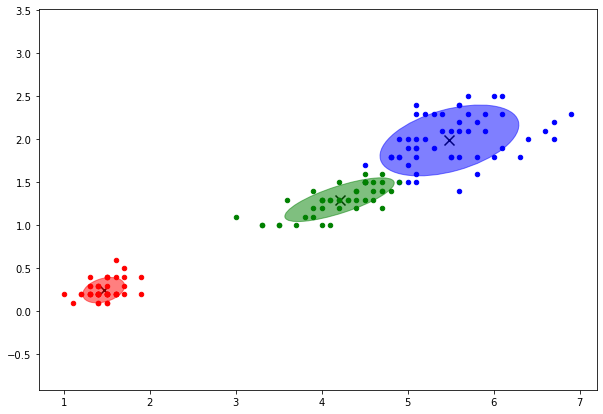

In [23]:
import numpy as np
import matplotlib.pyplot as plt
colors = ["red", "blue", "green"]

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize=(10.0,7.0))
for k, col in zip(range(len(np.unique(y))), colors):
    ## Lista de Trues para las posiciones de la etiqueta en curso
    my_members = (y_gmm == k)

    ## El centroide en negro y más grande
    centroid = gmm.means_[k]
    #p.scatter(centroid[0],centroid[1], marker="asterisk", size=12, legend_label="centroides", fill_color=col)
    #p.scatter(X[my_members, 0], X[my_members, 1], marker="circle", size=5, fill_color=col, legend_label="Grupo %d" % k)
    #plt.scatter(x, y, s=area, c=colors, alpha=0.5)
    plt.scatter(centroid[2],centroid[3], marker="x", label="centroides", color="black", s=100)
    plt.scatter(X[my_members, 2], X[my_members, 3], marker="o", color=col, s=20, label="Grupo %d" % k)
make_ellipses(gmm, ax)
plt.show()

### Elección del número de Clusters en clustering probabilísticos

Elegimos el modelo que __minimiza__ el índice __BIC__ (__criterio de información bayesiano__)

$$BIC=p \cdot ln(N) - 2 \cdot ln(\mathcal{L})$$

Donde __p__ y __N__ son, respectivamente, el número de parámetros libres y el total de registros del conjunto __X__ y $\mathcal{L}$ la función de verosimilitud del modelo.

El índice __BIC__ se obtiene con el método __bic(X)__ de la clase __GaussianMixture__:

C:\Users\valer_z\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


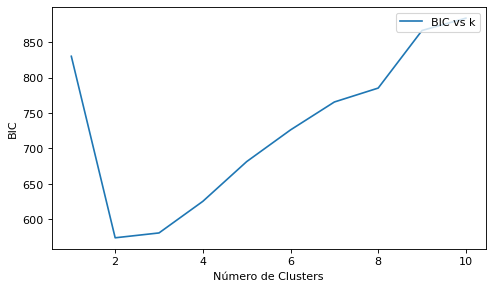

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
bic = []
for i in range(1, 11):
    ##covariance_type="full"
    ## n_components : nº de clusters
    ## cov_params = n_components * n_features * (n_features + 1) / 2.0
    ## mean_params = n_features * self.n_components
    ## p (Nº de parámetros libres) --> _n_parameters =  int(cov_params + mean_params + self.n_components - 1)
    gmm = GaussianMixture(n_components=i, init_params='kmeans')
    gmm.fit(X)
    bic.append(gmm.bic(X))
    wbic = gmm._n_parameters()*np.log(X.shape[0])-2*gmm.score(X)*X.shape[0]
    #print("Log-Verosimilitud Promedio", gmm.score(X_scaled), "Parámetros libres", gmm._n_parameters(),"bic", gmm.bic(X_scaled), wbic)

plt.figure(figsize=(7, 4), dpi=80)
plt.plot(range(1,11), bic, label="BIC vs k")
plt.xlabel("Número de Clusters")
plt.ylabel("BIC")
plt.legend(loc='upper right')
plt.show()    

## Medidas de validación externas

__INDICE DE RAND__: es una medida de __similitud entre dos particiones__.

Dadas dos particiones

$$X={X_1, ..., X_K}$$
$$Y={Y_1, ..., Y_Q}$$

Se definen las cantidades:

- <b>$N_{00}$</b> es el número de pares de instancias que están en el __mismo__ subconjunto de $X$ y en el __mismo__ subconjunto de $Y$.
- <b>$N_{11}$</b> es el número de pares de instancias que están en __distintos__ subconjuntos de $X$ y en __distintos__ subconjuntos de $Y$.
- <b>$N_{01}$</b> es el número de pares de instancias que están en el __mismo__ subconjunto de $X$ y en __distintos__ subconjuntos de $Y$.
- <b>$N_{10}$</b> es el número de pares de instancias que están en __distintos__ subconjuntos de $X$ y en el __mismo__ subconjunto de $Y$.

Dada la definición de estos 4 números se tiene:

- <b>$N_{00} + N_{11}$</b> es una medida del número de aciertos entre las dos particiones $X$ e $Y$.
- <b>$N_{01} + N_{10}$</b> es una medida del número de fallos entre $X$ e $Y$ .
- Definimos:

$$R = \frac{N_{00} + N_{11}}{N_{00} + N_{11} + N_{01} + N_{10}}=\frac{N_{00} + N_{11}}{\binom{N}{2}}$$

- El denominador $a+b+c+d = \binom{N}{2}$ es el número total de pares de instancias posibles. 
- El __Índice de Rand ajustado (ARI)__ normaliza numerador y denominador teniendo en cuenta los valores esperados cuando las particiones X e Y se hacen al azar.

$$ARI  = \frac{R - R_{Experado}}{max(R) - R_{Experado}} = \frac{2(N_{00}N_{11}-N_{01}N_{10})}{(N_{00}+N_{01})(N_{01}+N_{11})+(N_{00}+N_{10})(N_{10}+N_{11})} $$

El índice ARI tendrá un valor cercano a 0,0 para el etiquetado aleatorio independientemente del número de agrupaciones y muestras y exactamente 1,0 cuando las agrupaciones son idénticas.

Si comparamos con una partición fiable __previa__ (hecha por expertos), interesa que ARI sea cercano a 1.

La librería __sklearn.metrics.cluster__ contiene métricas de evaluación para los resultados del análisis de clusters. Hay dos formas de evaluación:

- __supervisado__, que utiliza valores de clase correctos para cada muestra.

- __sin supervisión__, mide la "calidad" intrínseca del propio modelo.

Así dentro de esta librería tenemos las clases:

- __rand_score__: que calcula el Índice Rand. A partir de una lista de etiquetas real y predicha.
- __adjusted_rand_score__: que calcula el Índice ARI. También a partir de una lista de etiquetas real y predicha

Se muestra algo de código para ver en que consiste el índice Rand estándar y ajustado. Pero lo calcularemos a través de las librerías __sklearn.metrics.cluster.rand_score__ y __sklearn.metrics.cluster.adjusted_rand_score__:

In [60]:
def RandIndex(y1, y2):
    N00,N01,N10,N11=0,0,0,0
    assert (np.size(y1) ==  np.size(y2)),"El tamaño de los clusters debe ser idéntico"
    N=np.size(y1)
    for i in range(N):
        for j in range(N):
            if i==j:
                pass
            elif y1[i]==y1[j] and y2[i]==y2[j]:
                N00+=1
            elif y1[i]==y1[j] and y2[i]!=y2[j]:
                N01+=1
            elif y1[i]!=y1[j] and y2[i]==y2[j]:
                N10+=1
            else:
                N11+=1
    return (N00+N11)/(N00+N11+N10+N01)

def AdjustedRandIndex(y1, y2):
    N00,N01,N10,N11=0,0,0,0
    assert (np.size(y1) ==  np.size(y2)),"El tamaño de los clusters debe ser idéntico"
    N=np.size(y1)
    for i in range(N):
        for j in range(N):
            if i==j:
                pass
            elif y1[i]==y1[j] and y2[i]==y2[j]:
                N00+=1
            elif y1[i]==y1[j] and y2[i]!=y2[j]:
                N01+=1
            elif y1[i]!=y1[j] and y2[i]==y2[j]:
                N10+=1
            else:
                N11+=1
    return 2*(N00*N11-N01*N10)/((N00+N01)*(N01+N11)+(N00+N10)*(N10+N11))

__Vamos a validar el cluster obtenido contra el valor real de la etiqueta del conjunto Iris__

In [61]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score
print("KMeans    R_Libreria=%.3f   R_propia=%.3f" %(rand_score(labels_true=y, labels_pred=y_km), RandIndex(y, y_km)))
print("KMeans  ARI_Libreria=%.3f ARI_propia=%.3f" %(adjusted_rand_score(labels_true=y, labels_pred=y_km), AdjustedRandIndex(y, y_km)))

KMeans    R_Libreria=0.880   R_propia=0.880
KMeans  ARI_Libreria=0.730 ARI_propia=0.730


In [62]:
RandIndex([0,0,1,1], [0,1,1,1]), rand_score([0,0,1,1], [0,1,1,1])

(0.5, 0.5)

In [63]:
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score
y_gmm = gmm.predict(X)
print("KMeans  R=%.3f ARI=%.3f" %(rand_score(labels_true=y, labels_pred=y_km), adjusted_rand_score(labels_true=y, labels_pred=y_km)))
print("GaussMM R=%.3f ARI=%.3f" %(rand_score(labels_true=y, labels_pred=y_gmm), adjusted_rand_score(labels_true=y, labels_pred=y_gmm)))

KMeans  R=0.880 ARI=0.730
GaussMM R=0.957 ARI=0.904


__INDICE VI (VARIACIÓN DE LA INFORMACIÓN) DE MARINA MEILĂ__

El __Índice VI__ {cite:p}`Meila_2003` es una medida de la __distancia ("disimilaridad") entre dos particiones__.

- Mide la cantidad de "información" ganada o perdida al pasar del agrupamiento $X$ a $Y$ .
- Se define como suma de dos "entropías condicionadas":

$$VI(X,Y) = H(X|Y) + H(Y|X)$$

- $H(X|Y)$ mide la cantidad de información sobre $X$ que __perdemos__ al pasar de $X$ a $Y$.
- $H(Y|X)$ mide la cantidad de información sobre $Y$ que __ganamos__ al pasar de $X$ a $Y$.

El __índice VI__ resulta ser ({cite:p}`bielza2020data` - pp 462):

$$VI(X,Y) = H(X) + H(Y) - 2*IM(X, Y)$$

Siendo $H(X)$ y $H(Y)$ la entropia de cada cluster e $IM(X, Y)$ la información mutua.

Si comparamos con una partición fiable __previa__ (hecha por expertos), interesa que VI sea pequeño.

El __índice VI__ es posible calcular de la forma que se indica a continuación (la rutina propia __informacionMutua__ coincide con  __sklearn.metrics.cluster.mutual_info_score__, por lo que se puede sustituir).

A partir del índice VI estándar es posible definir:
- __Indice VI ajustado__: dividiendo por el logaritmo neperiano de $N$ ({cite:p}`Meila_2007`). Implementación propia en __adjustedVariationInformation__.
- __Indice VI normalizado__: dividiendo por la suma de las entropias de $X$ e $Y$ ({cite:p}`bielza2020data` - pp 462; {cite:p}`Wu_2009`). Implementación propia en __normalizedVariationInformation__.

In [29]:
import numpy as np
from sklearn.metrics.cluster import mutual_info_score
def EntropiaCluster(y):
    n = np.size(y)
    etiquetas = np.unique(y)
    entropia=0
    for et in etiquetas:
        fr = np.size(y[y==et])/n
        entropia += -fr*np.log(fr)
    return entropia
def probEtiqueta(y, et):
    return np.size(y[y==et])/np.size(y)
def probConjunta(y1, y2, et1, et2):
    ## Se parte que el nº de elementos en y1 e y2 es el mismo
    return np.size(y1[(y1==et1)*(y2==et2)])/np.size(y1)
def informacionMutua(y1, y2):
    etiquetas1 = np.unique(y1)
    etiquetas2 = np.unique(y2)
    
    infoMutua=0
    for et1 in etiquetas1:
        for et2 in etiquetas2:
            if probConjunta(y1, y2, et1, et2)>0:
                infoMutua += probConjunta(y1, y2, et1, et2)*np.log(probConjunta(y1, y2, et1, et2)/(probEtiqueta(y1, et1)*probEtiqueta(y2, et2)))
    return infoMutua
def variationInformation(y1, y2):
    return EntropiaCluster(y1) + EntropiaCluster(y2) - 2*informacionMutua(y1, y2)
    #eturn EntropiaCluster(y1) + EntropiaCluster(y2) - 2*mutual_info_score(y1, y2)

def adjustedVariationInformation(y1, y2):
    return variationInformation(y1, y2) / np.log(np.size(y1))

def normalizedVariationInformation(y1, y2):
    return variationInformation(y1, y2) / (EntropiaCluster(y1) + EntropiaCluster(y2))

In [34]:
print("KMeans  VI=%.3f AVI=%.3f  NVI=%.3f" %(variationInformation(y, y_km), adjustedVariationInformation(y, y_km), 
                                             normalizedVariationInformation(y, y_km)))
print("GaussMM VI=%.3f AVI=%.3f  NVI=%.3f" %(variationInformation(y, y_gmm), adjustedVariationInformation(y, y_gmm), 
                                             normalizedVariationInformation(y, y_gmm)))

KMeans  VI=0.527 AVI=0.105  NVI=0.242
GaussMM VI=0.668 AVI=0.133  NVI=0.390


El __VI__ y el __AVI__ cumplen ser una distancia  (Meilă, 2007). Tienen las propiedades __reflexiva__, __simétrica__ y __triangular__.

Ademas el valor de __VI__ depende solo del tamaño relativo de los grupos. No depende directamente del número de observaciones del conjunto de datos. Se cumple:

- $VI(X,Y) \le ln(N)$
- $VI(X,Y) \le 2 \cdot ln(K)$

In [139]:
print("Reflexiva  VI(y,y)=%.5f" %(variationInformation(y, y)))
print("Simétrica  VI(y,y_km)=%.5f  VI(y_km,y)=%.5f" %(variationInformation(y, y_km), variationInformation(y_km, y)))
print("Triangular VI(y,y_km) + VI(y_km,y_gmm)=%.5f >= VI(y,y_gmm)=%.5f" % (variationInformation(y, y_km) 
                + variationInformation(y_km, y_gmm), variationInformation(y, y_gmm)))

Reflexiva  VI(y,y)=0.00000
Simétrica  VI(y,y_km)=0.52665  VI(y_km,y)=0.52665
Triangular VI(y,y_km) + VI(y_km,y_gmm)=1.03944 >= VI(y,y_gmm)=0.53218
